In [1]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('hotels-classification.csv')

In [3]:
data.head()

,screen_name,name,description,statuses_count,friends_count,followers_count,recent_100_statuses,hotel
0,medpalace,Mediterranean Palace,A cozy 5 star hotel in the city center with an...,269,543,381,https://t.co/WPCR6KSnw2 New era!\nNew Brand! ...,1
1,RodosPalace,Rodos Palace | abav²,Rodos Palace is regarded as the finest deluxe ...,1169,615,577,"Καλή εβδομάδα με άρωμα Πασχαλινών διακοπών. ""...",1
2,Cactus_Rhodes,Cactus Hotel,NaN,719,14,40,Friendly service and relaxing atmosphere\n\nF...,1
3,SantoriniVillas,Villas & Mansions,Private Villas & Mansions in Santorini offerin...,114,473,189,SANTORINI No2 ISLAND DESTINATION WORDWIDE\n\n...,1
4,SunRocksHotel,Sun Rocks Hotel,An enchanting romantic couples' getaway in the...,252,94,337,Who’s ready for a season full of #deliciousjo...,1


# Statistics
---

## All Nodes

In [5]:
data.describe().drop('hotel', axis=1).drop('count').round(2)

,statuses_count,friends_count,followers_count
mean,5002.94,414.78,68838.44
std,34304.32,730.60,574811.04
min,0.00,0.00,0.00
25%,51.75,31.25,65.25
50%,478.50,127.50,285.00
75%,1973.50,434.50,969.25
max,532696.00,4958.00,8488807.00


In [6]:
data['description'].replace(np.nan, '', inplace=True)
count = len(data)
no_desc_count = len(data[data['description'] == ''])
print(f'{(no_desc_count/count)*100}% (Total: {no_desc_count}) of the nodes do not have a profile descirption')

16.400000000000002% (Total: 41) of the nodes do not have a profile descirption


## Hotels

In [7]:
data[data['hotel'] == 1].describe().drop('hotel', axis=1).drop('count').round(2)

,statuses_count,friends_count,followers_count
mean,784.1,402.45,1398.59
std,1604.0,645.45,10626.78
min,0.0,0.00,0.00
25%,25.0,28.00,60.00
50%,291.0,136.00,183.00
75%,708.0,462.00,534.00
max,12978.0,4046.00,118990.00


In [8]:
data['description'].replace(np.nan, '', inplace=True)
count = len(data[data['hotel'] == 1])
no_desc_count = len(data[(data['hotel'] == 1) & (data['description'] == '')])
no_status_count = len(data[(data['hotel'] == 1) & (data['statuses_count'] == 0)])
no_friends_count = len(data[(data['hotel'] == 1) & (data['friends_count'] == 0)])
no_followers_count = len(data[(data['hotel'] == 1) & (data['followers_count'] == 0)])

no_desc_status = len(data[(data['hotel'] == 1)
                          &(data['description'] == '')
                          &(data['statuses_count'] == 0)])
no_desc_status_friends = len(data[(data['hotel'] == 1) 
                                  &(data['description'] == '')
                                  &(data['statuses_count'] == 0)
                                  &(data['friends_count'] == 0)])

no_desc_status_followers = len(data[(data['hotel'] == 1) 
                                  &(data['description'] == '')
                                  &(data['statuses_count'] == 0)
                                  &(data['friends_count'] == 0)
                                  &(data['followers_count'] == 0)])



print(f'No Descriptions: {(no_desc_count/count)*100}% (Total: {no_desc_count})')
print(f'No Tweets: {(no_status_count/count)*100}% (Total: {no_status_count})')
print(f'No Friends:{(no_friends_count/count)*100}% (Total: {no_friends_count})')
print(f'No Followers:{(no_followers_count/count)*100}% (Total: {no_followers_count})')

print(f'No Description and Tweets: {(no_desc_status/count)*100}% (Total: {no_desc_status})')
print(f'No Description,Tweets,Friends: {(no_desc_status_friends/count)*100}% (Total: {no_desc_status_friends})')
print(f'No Description,Tweets,Friends, Followers, Friends: {(no_desc_status_followers/count)*100}% (Total: {no_desc_status_followers})')

No Descriptions: 19.2% (Total: 24)
No Tweets: 8.799999999999999% (Total: 11)
No Friends:4.8% (Total: 6)
No Followers:1.6% (Total: 2)
No Description and Tweets: 4.8% (Total: 6)
No Description,Tweets,Friends: 1.6% (Total: 2)
No Description,Tweets,Friends, Followers, Friends: 0.8% (Total: 1)


## Not Parliament Members

In [9]:
data[data['hotel'] == 0].describe().drop(['hotel'], axis=1).drop('count').round(2)

,statuses_count,friends_count,followers_count
mean,9221.77,427.12,136278.28
std,48214.16,809.29,808824.77
min,0.00,0.00,0.00
25%,140.00,36.00,81.00
50%,1264.00,124.00,379.00
75%,4487.00,404.00,3706.00
max,532696.00,4958.00,8488807.00


In [10]:
data['description'].replace(np.nan, '', inplace=True)
count = len(data[data['hotel'] == 0])
no_desc_count = len(data[(data['hotel'] == 0) & (data['description'] == '')])
no_status_count = len(data[(data['hotel'] == 0) & (data['statuses_count'] == 0)])
no_friends_count = len(data[(data['hotel'] == 0) & (data['friends_count'] == 0)])
no_followers_count = len(data[(data['hotel'] == 0) & (data['followers_count'] == 0)])

no_desc_status = len(data[(data['hotel'] == 0)
                          &(data['description'] == '')
                          &(data['statuses_count'] == 0)])
no_desc_status_friends = len(data[(data['hotel'] == 0) 
                                  &(data['description'] == '')
                                  &(data['statuses_count'] == 0)
                                  &(data['friends_count'] == 0)])
no_desc_status_followers = len(data[(data['hotel'] == 0) 
                                  &(data['description'] == '')
                                  &(data['statuses_count'] == 0)
                                  &(data['friends_count'] == 0)
                                  &(data['followers_count'] == 0)])



print(f'No Descriptions: {(no_desc_count/count)*100}% (Total: {no_desc_count})')
print(f'No Tweets: {(no_status_count/count)*100}% (Total: {no_status_count})')
print(f'No Friends:{(no_friends_count/count)*100}% (Total: {no_friends_count})')
print(f'No Followers:{(no_followers_count/count)*100}% (Total: {no_followers_count})')
print(f'No Description and Tweets: {(no_desc_status/count)*100}% (Total: {no_desc_status})')
print(f'No Description,Tweets,Friends: {(no_desc_status_friends/count)*100}% (Total: {no_desc_status_friends})')
print(f'No Description,Tweets,Friends, Followers, Friends: {(no_desc_status_followers/count)*100}% (Total: {no_desc_status_followers})')

No Descriptions: 13.600000000000001% (Total: 17)
No Tweets: 1.6% (Total: 2)
No Friends:6.4% (Total: 8)
No Followers:1.6% (Total: 2)
No Description and Tweets: 1.6% (Total: 2)
No Description,Tweets,Friends: 1.6% (Total: 2)
No Description,Tweets,Friends, Followers, Friends: 1.6% (Total: 2)


## Nodes without Description and Tweets

In [11]:
data[(data['description'] == '')&(data['statuses_count'] == 0)].sort_values('friends_count')

,screen_name,name,description,statuses_count,friends_count,followers_count,recent_100_statuses,hotel
42,HyattTweets,Hyatt Tweets,,0,0,232,NaN,1
106,thassosseascape,thassosseascape,,0,0,0,NaN,1
212,ReplayGR,Replay Greece,,0,0,0,NaN,0
235,lobbyclubstage,Lobby Club Stage,,0,0,0,NaN,0
88,alikescamping,a,,0,11,27,NaN,1
28,MedRoyalHotel,MedRoyalHotel,,0,15,15,NaN,1
121,SiennaSantorini,Sienna Residences,,0,21,10,NaN,1
110,Hotel_Kastoria,Hotel Kastoria,,0,40,3,NaN,1


# Word Frequencies
---

In [12]:
def clean_text(data):
    urls = r'http\S+'
    non_unicode_char = r'\W'
    numbers = r'[0-9_]'
    fix_whitespace = r'\s+'
    single_whitespace = ' '
    
    data = (data.replace([urls], single_whitespace, regex=True)
                    .replace([non_unicode_char, numbers], single_whitespace, regex=True)
                    .replace(fix_whitespace, single_whitespace, regex=True))
    data = data.apply(lambda s: s.lower() if type(s) == str else s)
    return data

nlp_el = spacy.load('el_core_news_md')
nlp_en = spacy.load('en_core_web_sm')
STOPWORDS = set(list(spacy.lang.en.STOP_WORDS) + list(spacy.lang.el.STOP_WORDS))

def remove_stopwords(row):
    row = [str(token) for token in nlp_el(row)]
    return [w for w in row if w not in STOPWORDS]

def tokenize_lemmatize(row):
    return [str(token.lemma_) for token in nlp_el(row)]

def tokenize_lemmatize_en(row):
    return [str(token.lemma_) for token in nlp_en(row)]

def remove_shortwords(row):
    row = [str(token) for token in nlp_el(row)]
    return [w for w in row if len(w) > 1]

In [13]:
data.replace(np.nan, '', inplace=True)
text_df = pd.DataFrame()
text_df['nd'] = clean_text(data['name'] +' '+data['description'])
text_df['t'] = clean_text(data['recent_100_statuses'])

In [15]:
text_df['nd'] = text_df['nd'].apply(lambda row: tokenize_lemmatize(row))
text_df['nd'] = text_df['nd'].apply(lambda row: ' '.join(row))
text_df['nd'] = text_df['nd'].apply(lambda row: tokenize_lemmatize_en(row))
text_df['nd'] = text_df['nd'].apply(lambda row: ' '.join(row))
text_df['nd'] = text_df['nd'].apply(lambda row: remove_stopwords(row))
text_df['nd'] = text_df['nd'].apply(lambda row: ' '.join(row))
text_df['nd'] = text_df['nd'].apply(lambda row: remove_shortwords(row))
text_df['nd'] = text_df['nd'].apply(lambda row: ' '.join(row))

text_df['t'] = text_df['t'].apply(lambda row: tokenize_lemmatize(row))
text_df['t'] = text_df['t'].apply(lambda row: ' '.join(row))
text_df['t'] = text_df['t'].apply(lambda row: tokenize_lemmatize_en(row))
text_df['t'] = text_df['t'].apply(lambda row: ' '.join(row))
text_df['t'] = text_df['t'].apply(lambda row: remove_stopwords(row))
text_df['t'] = text_df['t'].apply(lambda row: ' '.join(row))
text_df['t'] = text_df['t'].apply(lambda row: remove_shortwords(row))
text_df['t'] = text_df['t'].apply(lambda row: ' '.join(row))

In [16]:
text_df['hotel'] = data['hotel']

Text(0.5, 1.0, 'Όχι-Ξενοδοχεία')

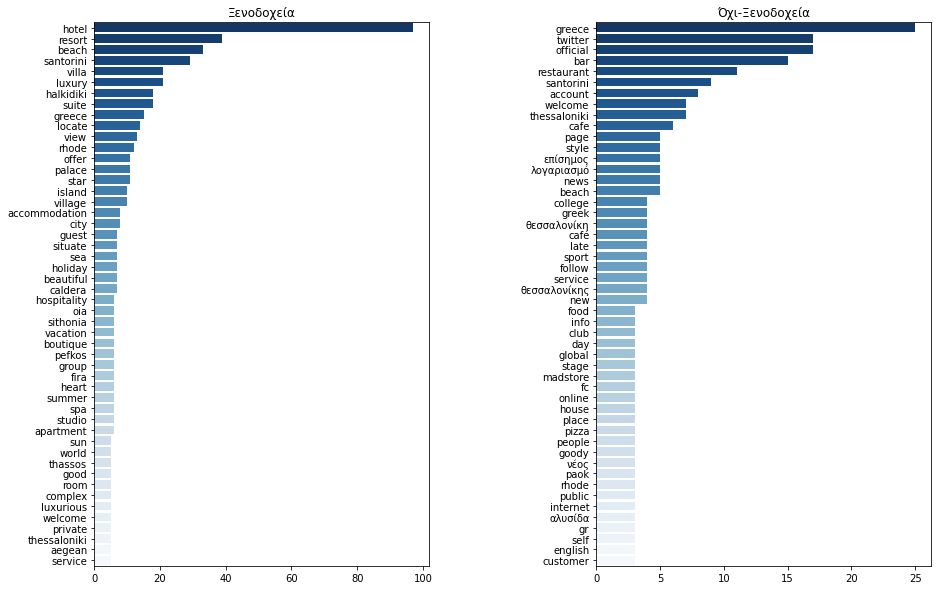

In [20]:
pol_words = pd.Series(' '.join(text_df[text_df.hotel == 1].nd).split()).value_counts()
nonpol_words = pd.Series(' '.join(text_df[text_df.hotel == 0].nd).split()).value_counts()

fig, axs = plt.subplots(1,2,figsize =(15,10))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5)

sns.barplot(y=pol_words[:50].index, x=pol_words[:50], orient='h', ax = axs[0], palette="Blues_r")
axs[0].set_title('Ξενοδοχεία')

sns.barplot(y=nonpol_words[:50].index, x=nonpol_words[:50], orient='h', ax = axs[1], palette="Blues_r")
axs[1].set_title('Όχι-Ξενοδοχεία')

Text(0.5, 1.0, 'Όχι-Ξενοδοχεία')

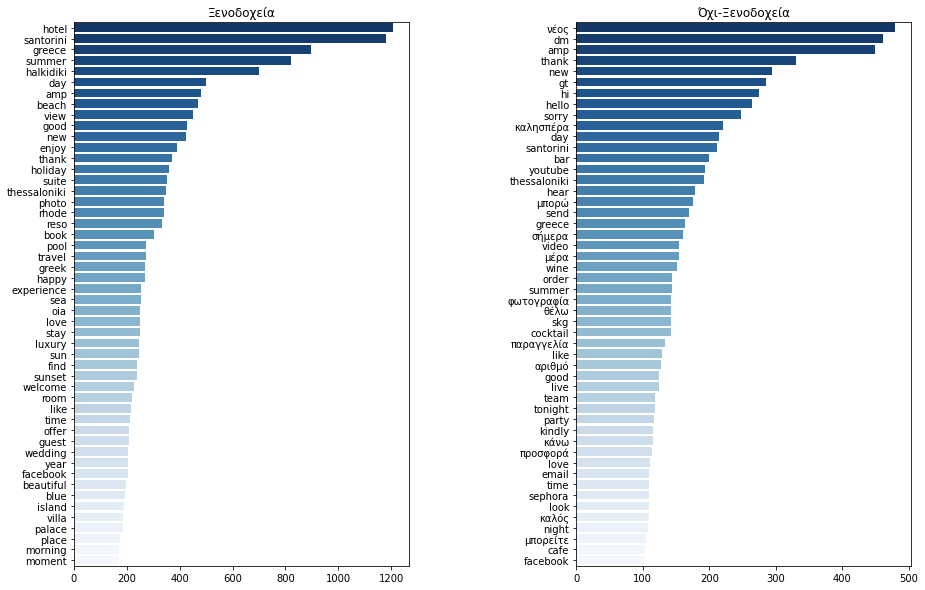

In [21]:
text_df['t'] = text_df['t'].replace('rt\s', ' ', regex=True)
pol_words = pd.Series(' '.join(text_df[text_df.hotel == 1].t).split()).value_counts()
nonpol_words = pd.Series(' '.join(text_df[text_df.hotel == 0].t).split()).value_counts()

fig, axs = plt.subplots(1,2,figsize =(15,10))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5)

sns.barplot(y=pol_words[:50].index, x=pol_words[:50], orient='h', ax = axs[0], palette="Blues_r")
axs[0].set_title('Ξενοδοχεία')

sns.barplot(y=nonpol_words[:50].index, x=nonpol_words[:50], orient='h', ax = axs[1], palette="Blues_r")
axs[1].set_title('Όχι-Ξενοδοχεία')